# Volkswagen_Used_Car_Exploratory Data Analysis

### Created by: Subrata Saha
### Date: 15.03.2022

#### Contents :
1. Import required libraries and Read dataset
2. Exploratory Data Analysis
3. Percentage of cars for each 'transmission' type- Pie Chart and Bar plot 
4. Percentage of cars for each 'fuelType'- Pie Chart and Bar plot 
5. Relationship between the numerical variables- scatter plot and Regression line
6. Pairplot
7. Histogram and ECDF of numeric columns
8. Percentile and data distribution- Box plot and Violin plot

### 1. Import required libraries and packages and Read dataset

In [1]:
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [2]:
# load dataset
df = pd.read_csv("vw.csv")

display(df.head())

# shape
print(df.shape)

print("number of rows = ", df.shape[0])
print("number of columns = ", df.shape[1])

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,39.8,1.5


(15157, 8)
number of rows =  15157
number of columns =  8


### 2. EDA

In [3]:
# Check for missing values, data types of the columns
df.info() # Nan - not a number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   mpg           15157 non-null  float64
 7   engineSize    15157 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 947.4+ KB


<br> **NOTE**: Total 8 features, 3 categorical features, 5 numeric features.

#### Find numeric columns

In [4]:
num_cols = []

for col in df.columns:
    if df[col].dtypes != "O":
        num_cols.append(col)
#        print(num_cols)

print('numerical columns:',num_cols)

cat_cols = []

for col in df.columns:
    if df[col].dtypes == "O":
        cat_cols.append(col) 
#        print(cat_cols)

print('categorical columns:',cat_cols)

numerical columns: ['year', 'price', 'mileage', 'mpg', 'engineSize']
categorical columns: ['model', 'transmission', 'fuelType']


#### Count the number of unique values present in the 'transmission' column

In [5]:
print(df["transmission"].value_counts())

# unique values
print('\nunique values',df["transmission"].unique())

Manual       9417
Semi-Auto    3780
Automatic    1960
Name: transmission, dtype: int64

unique values ['Automatic' 'Manual' 'Semi-Auto']


#### Count the number of unique values present in the 'fuelType' column

In [6]:
print(df["fuelType"].value_counts())

# unique values
print('\nunique values',df["fuelType"].unique())

Petrol    8553
Diesel    6372
Hybrid     145
Other       87
Name: fuelType, dtype: int64

unique values ['Diesel' 'Petrol' 'Other' 'Hybrid']


### 3. Percentage of cars for each 'transmission' type- Pie Chart and Bar plot 

#### 3.1.  Pie chart on 'transmission' column

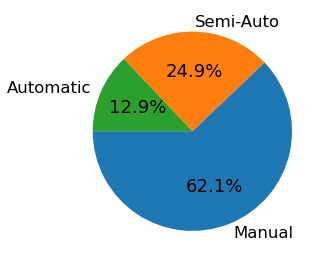

In [7]:
df["transmission"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=180)
plt.ylabel("")
plt.tight_layout()
plt.show()

#### 3.2.  Bar plot on 'transmission' column

#### percentage of unique values present in the 'transmission' column

In [8]:
# converting to dataframe
df_transmission = pd.DataFrame(df["transmission"].value_counts())
df_transmission = df_transmission.reset_index()
df_transmission = df_transmission.rename(columns={"index":"transmission",
                                          "transmission":"no_of_cars"})

df_transmission["% of cars"] = (df_transmission["no_of_cars"]/df.shape[0])*100

df_transmission = df_transmission.round(2)

# df_transmission = np.round(df_transmission, 2)

display(df_transmission)

,transmission,no_of_cars,% of cars
0,Manual,9417,62.13
1,Semi-Auto,3780,24.94
2,Automatic,1960,12.93


#### Barplot for the 'transmission' column

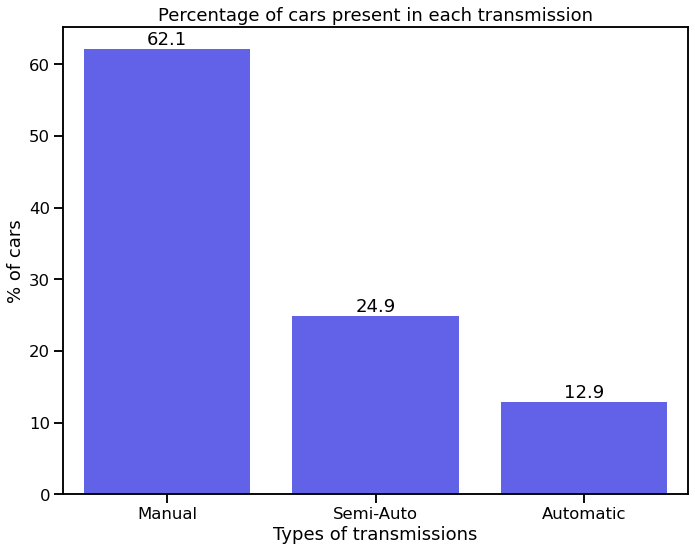

In [9]:
# using annotations

plt.figure(figsize=(10,8))
splot=sns.barplot(x="transmission",y="% of cars",data=df_transmission,color="blue",alpha=0.7)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Types of transmissions")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each transmission")
plt.tight_layout()
plt.show()

 <br> **NOTE**: 
 - From Barplot and pie chart of the transmission column, we can notice that, More than half of the cars have Manual transmission.
 - Almost 13% cars have automatic transmission which is the lowest among the three types of transmissions.

### 4. Percentage of cars for each 'fuelType'- Pie Chart and Bar plot 

#### 4.1. Pie Chart on 'fuelType' column

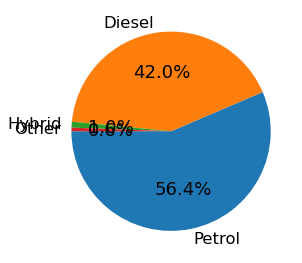

In [10]:
df["fuelType"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=180)
plt.ylabel("")
plt.tight_layout()
plt.show()

 <br> **NOTE**: 
 - From pie chart of the fuelType column, we can notice that, More than half of the cars uses petrol as fuel.
 - one problem with pie chart is that 'hybrid' and 'other' fuel type is indistinguishable,so we need another type of visualization.

#### 4.2.  Bar plot on 'fuelType' column

#### percentage of unique values present in the 'fuelType' column

In [11]:
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns={"index":"fuelType",
                                          "fuelType":"no_of_cars"})

df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100

df_fuelType = df_fuelType.round(2)

display(df_fuelType)

,fuelType,no_of_cars,% of cars
0,Petrol,8553,56.43
1,Diesel,6372,42.04
2,Hybrid,145,0.96
3,Other,87,0.57


#### Barplot for the 'fuelType' column

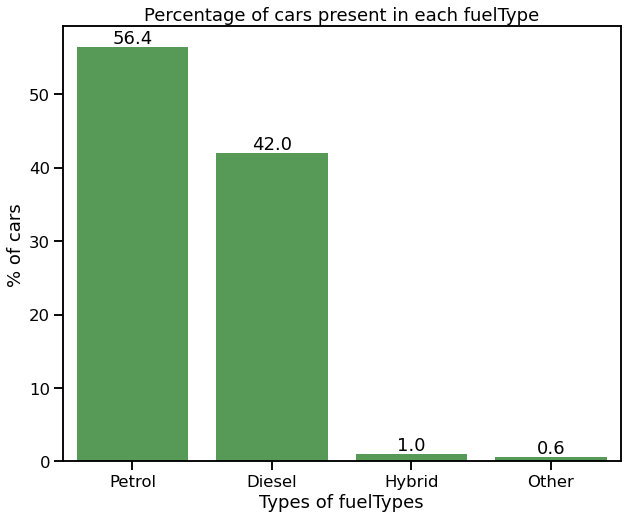

In [12]:
plt.figure(figsize=(10, 8))
splot=sns.barplot(x="fuelType",y="% of cars",data=df_fuelType,color="g",alpha=0.7)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Types of fuelTypes")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each fuelType")
plt.show()

 <br> **NOTE:** 
 - For 'fuelType' attribute, Bar plot visualization is better than pie chart, 
 - Hybrid and other fueltype cars are very negligible and almost zero compared to petrol and diesel fueltype.
 - Petrol cars are more than half of the total cars.

### 5. Relation between the numerical variables- Scatter plot and Regression line


- Scatterplot of mileage vs price
- Scatterplot of mpg vs price
- Scatterplot of engineSize vs price

#### 5.1 Scatter plot

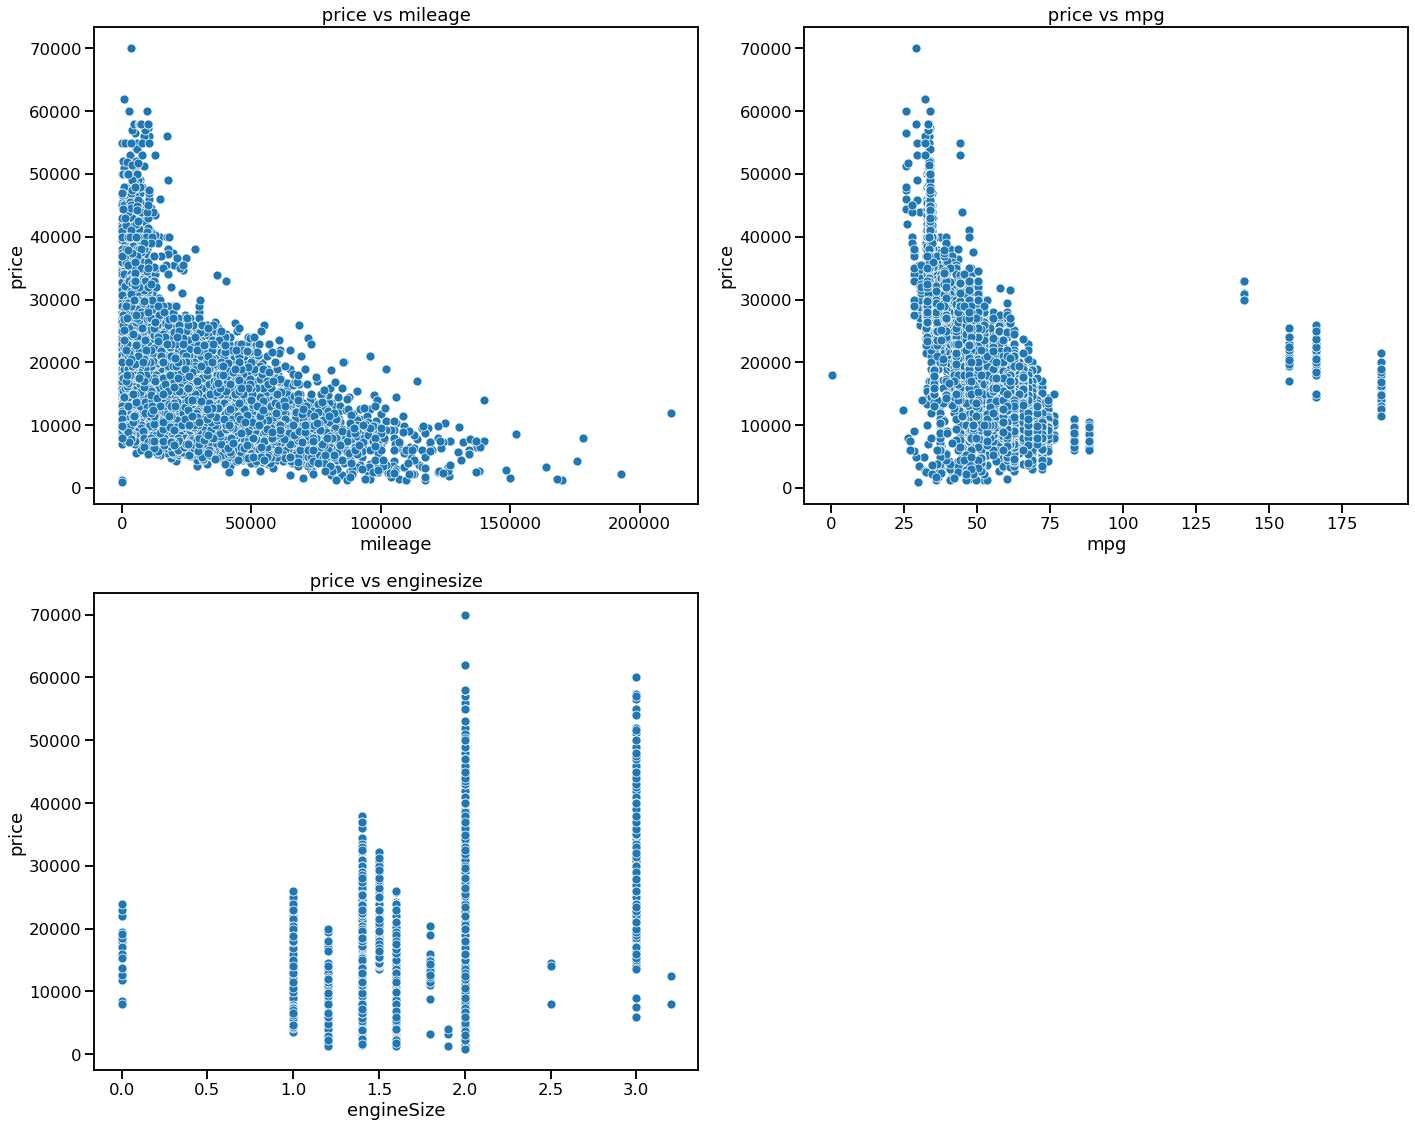

In [13]:
plt.figure(figsize=(20,16))

plt.subplot(2, 2, 1)
plt.title(" price vs mileage ")
sns.scatterplot(x="mileage", y="price", data=df)

plt.subplot(2, 2, 2)
plt.title(" price vs mpg ")
sns.scatterplot(x="mpg", y="price", data=df)

plt.subplot(2, 2, 3)
plt.title(" price vs enginesize ")
sns.scatterplot(x="engineSize", y="price", data=df)

#plt.suptitle("Scatterplot of mileage, mpg and enginSize with price for Volkswagen used car dataset ")
plt.tight_layout()
plt.show()

<br> **NOTE**: 
- Price is negatively correlated with mileage,which means cars with more mileage have less price. 
- Relationship of mpg and enginesize with price is not clear from scatter plot.

#### 5.2 Using the hue parameter- fuelType

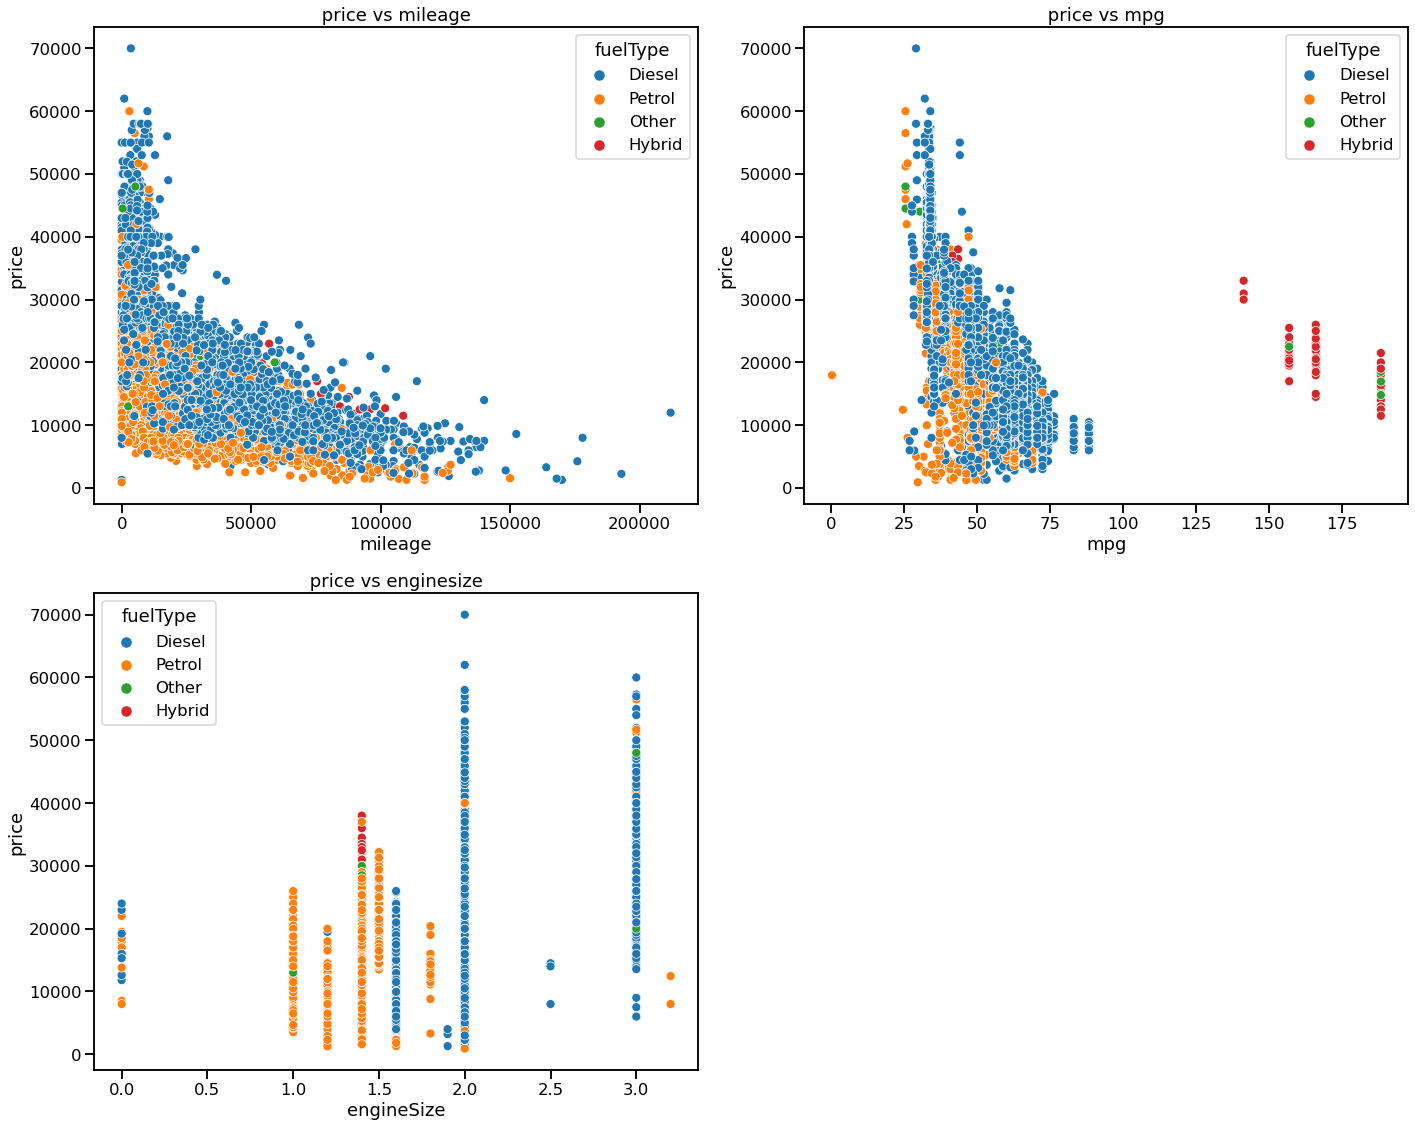

In [14]:
plt.figure(figsize=(20,16))

plt.subplot(2, 2, 1)
plt.title(" price vs mileage ")
sns.scatterplot(x="mileage", y="price", data=df, hue="fuelType")

plt.subplot(2, 2, 2)
plt.title(" price vs mpg ")
sns.scatterplot(x="mpg", y="price", data=df, hue="fuelType")

plt.subplot(2, 2, 3)
plt.title(" price vs enginesize ")
sns.scatterplot(x="engineSize", y="price", data=df, hue="fuelType")

plt.tight_layout()
plt.show()

<br> **NOTE**: 
- According to all three plots, most petrol cars have lower price range.
- Diesel cars are costlier irrespective of mileage. 
- Price of Hybrid cars varies from 12k to 24K$ and have more than 140 mpg.

#### 5.3 Using the hue parameter- transmission

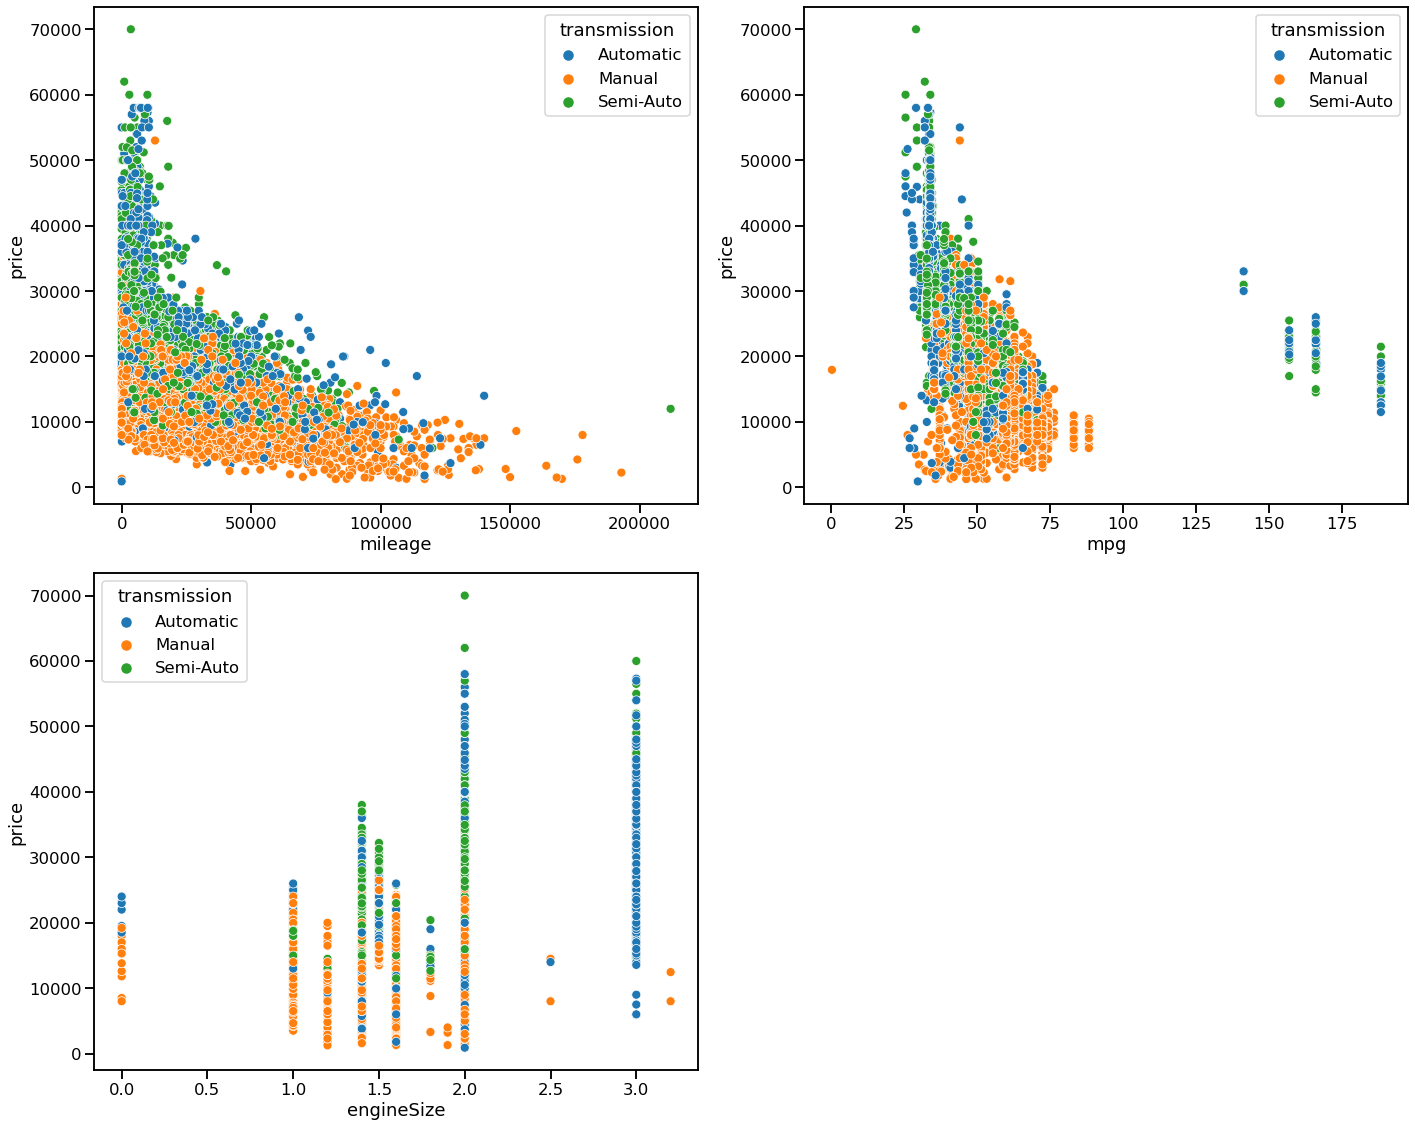

In [15]:
plt.figure(figsize=(20,16))

plt.subplot(2, 2, 1)
sns.scatterplot(x="mileage", y="price", data=df, hue="transmission")

plt.subplot(2, 2, 2)
sns.scatterplot(x="mpg", y="price", data=df, hue="transmission")

plt.subplot(2, 2, 3)
sns.scatterplot(x="engineSize", y="price", data=df, hue="transmission")

plt.tight_layout()
plt.show()

<br> **NOTE**: 
- According to all three plots, most manual cars have lower price range.
- Automatic cars are costlier irrespective of mileage, but in the low mileage(close to zero) semi automatic cars are expensive.

#### 5.4 Creating a trend line- price with mileage

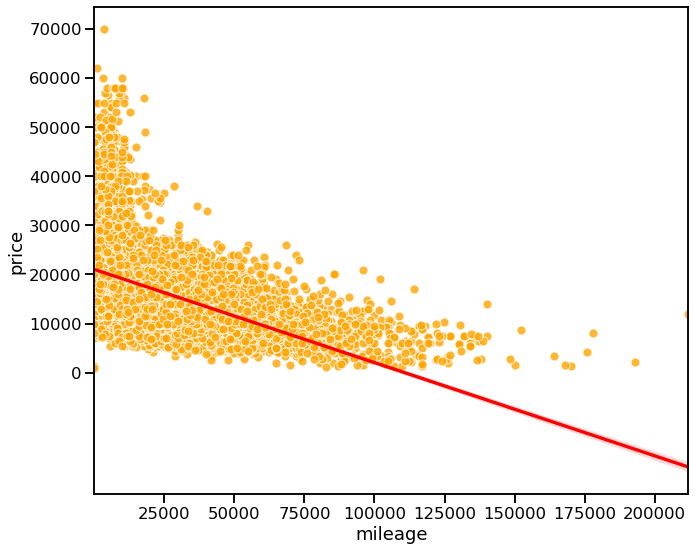

In [16]:
plt.figure(figsize=(10,8))

plt.yticks(np.arange(0,70001,10000))
sns.regplot(x="mileage", y="price", data=df,line_kws={"color":"r"}, scatter_kws={"color":"orange", "edgecolor":"white"})
#  line_kws for line,  scatter_kws is for scatter plot 

plt.tight_layout()
plt.show()

<br> **NOTE**: 
- Regression line clearly indicates negative relationship between price and mileage.

### 6. Pairplot

 #### 6.1  pairplot of VolksWagen used car dataset

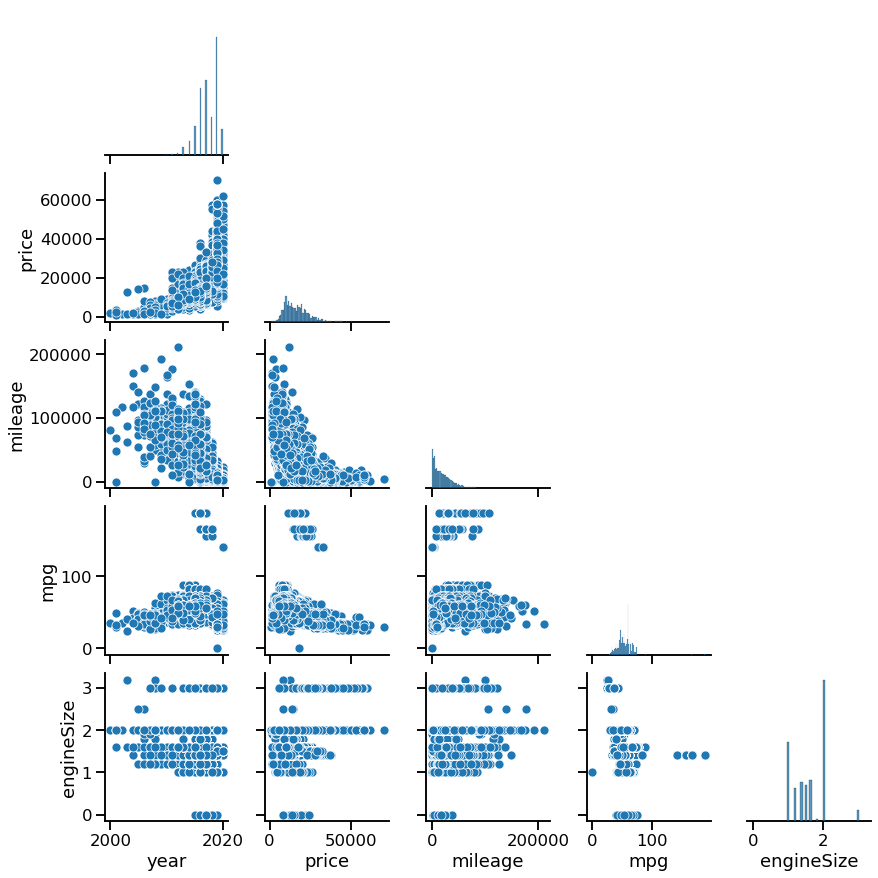

In [17]:
sns.pairplot(df, corner=True) # corner= True for half of the pairplot

<br> **NOTE**:
- Latest cars have higher prices. 
- Price is lower for cars with more mileage. 

#### Adding categorical feature as hue- transmission and fuelType

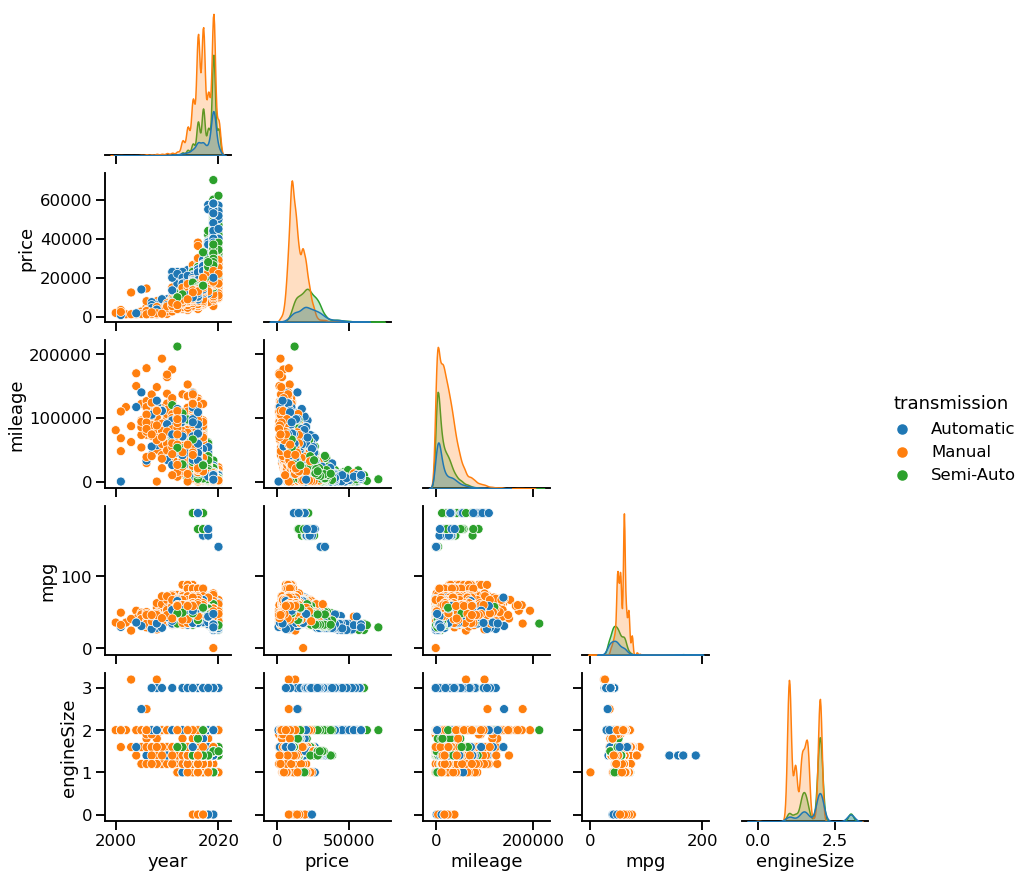

In [18]:
sns.pairplot(df, corner=True, hue="transmission")

<br> **NOTE**:
- Latest automatic cars have higher prices. 
- Maximum manual cars have enginsize between 1 and 2.
- Automatic cars have enginsize of 2 and 3 (although some have values of 1.5 and 2.5,those may be error)

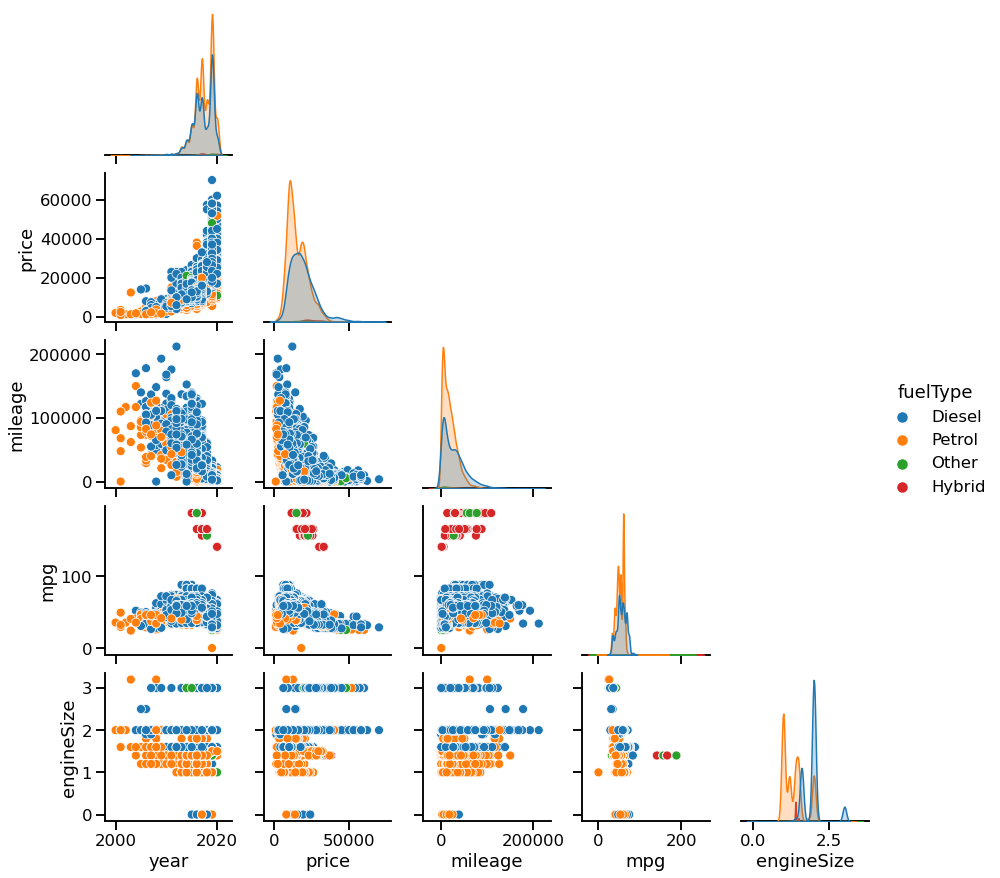

In [19]:
sns.pairplot(df, corner=True, hue="fuelType")

<br> **NOTE**:
- Latest diesel cars have higher prices. 
- Expensive diesel cars have lower milages.

### 7. Histogram and ECDF of numeric columns

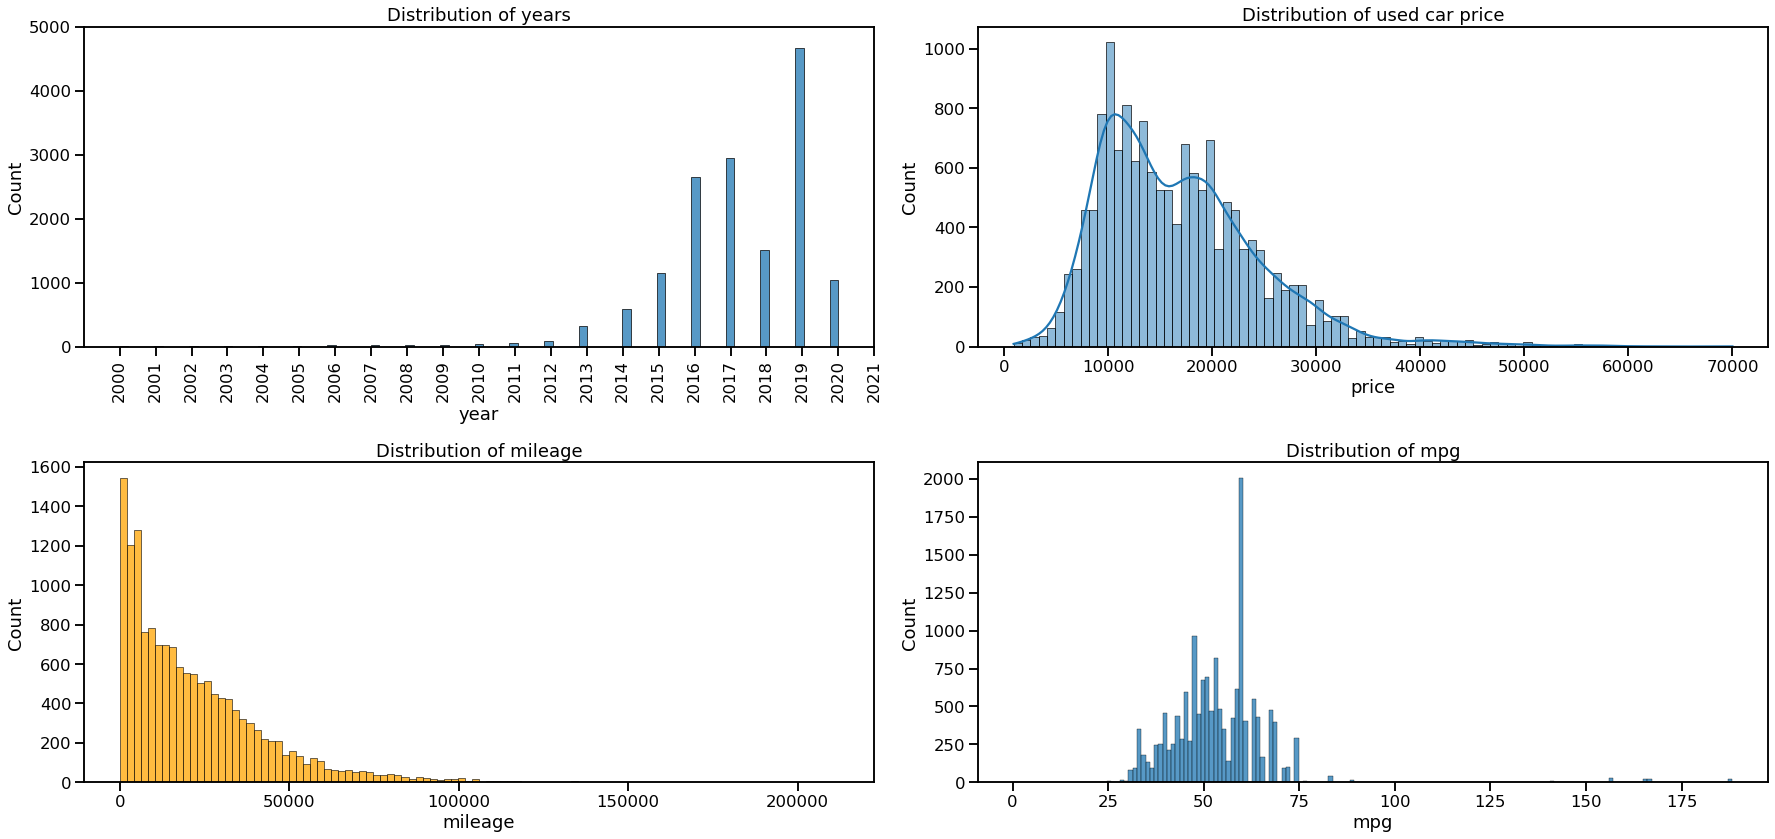

In [20]:
plt.figure(figsize=(25,12))

# year
plt.subplot(2,2,1)
sns.histplot(x="year", data=df)
plt.xticks(np.arange(df["year"].min(), df["year"].max()+2,1), rotation=90)
plt.yticks(np.arange(0, 5500, step=1000))
plt.title("Distribution of years")

# price
plt.subplot(2,2,2)
sns.histplot(x="price", data=df,kde=True)
plt.title("Distribution of used car price")

#mileage
plt.subplot(2,2,3)
sns.histplot(x="mileage", data=df,color="orange")
plt.title("Distribution of mileage")

#mpg
plt.subplot(2,2,4)
sns.histplot(x="mpg", data=df)
#plt.xticks(np.arange(df["Total_charges"].min(), df["Total_charges"].max()+51, 50), rotation=90)
plt.title("Distribution of mpg")

plt.tight_layout()
plt.show()

<br> **NOTE**: 
- most cars (about 4800) are from year 2019.
- most car prices range from 8000 to 25000$.

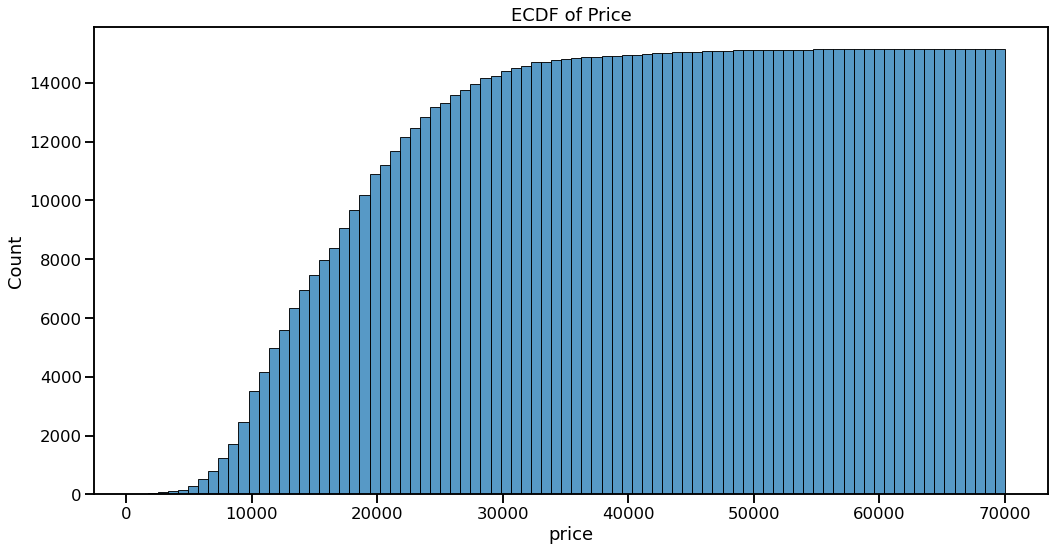

In [21]:
plt.figure(figsize=(15,8))
sns.histplot(x="price", data=df,cumulative=True)
plt.title("ECDF of Price")

plt.tight_layout()
plt.show()

### 8. Box plot and Violin plot

#### Summary Statistics

In [22]:
df.describe()

,year,price,mileage,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,188.300000,3.200000


#### Getting numerical and categorical columns from whole dataset- using for loop

In [23]:
num_cols = []

for col in df.columns:
    if df[col].dtypes != "O":
        num_cols.append(col)
#        print(num_cols)

print('numerical columns:',num_cols)

cat_cols = []

for col in df.columns:
    if df[col].dtypes == "O":
        cat_cols.append(col) 
#        print(cat_cols)

print('categorical columns:',cat_cols)
print('number of numeric columns:', len(num_cols))

numerical columns: ['year', 'price', 'mileage', 'mpg', 'engineSize']
categorical columns: ['model', 'transmission', 'fuelType']
number of numeric columns: 5


#### 8.1. Box plot

#### 8.1.1 Box plot for all numerical variables

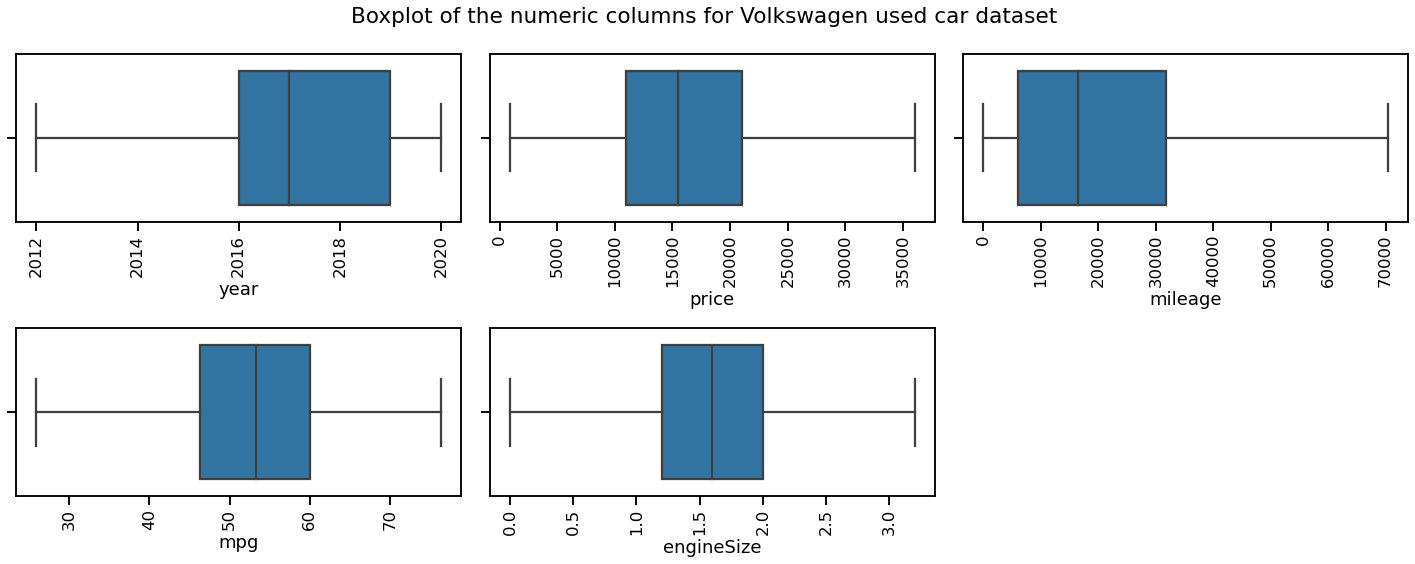

In [24]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)):
       
    plt.subplot(2,3,index+1) # index starts from zero, position starts from 1
    sns.boxplot(x=num_cols[index], data=df, showfliers=False)  # showfliers=False to ignore outliers
    plt.xticks(rotation=90)

plt.suptitle("Boxplot of the numeric columns for Volkswagen used car dataset ")
plt.tight_layout()
plt.show()

<br> **NOTE**: 
- 'year' column: oldest car is from 2012,earliest is from 2020, 25% percent cars from about 2016 , 50% of cars from early 2017, 75% cars from about 2019.
- 'price' column: lowest car price is about 1K, heighest is about 37K, 25% percent cars have values about 11K, 50% of cars have  values about 16K, 75% of cars have values about 22K ( price is in US dollar)
- 'mileage' column: lowest is about 0, heighest is about 7K, 25% percent cars have mileage below 10K and about 8K, 50% of cars have  mileage about 18K, 75% of cars have about 32K.
- 'mpg': 50% of cars have mpg more than 53.

#### 8.1.2 Adding categorical features in the boxplot- transmission

In [25]:
# unique values
df.transmission.unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

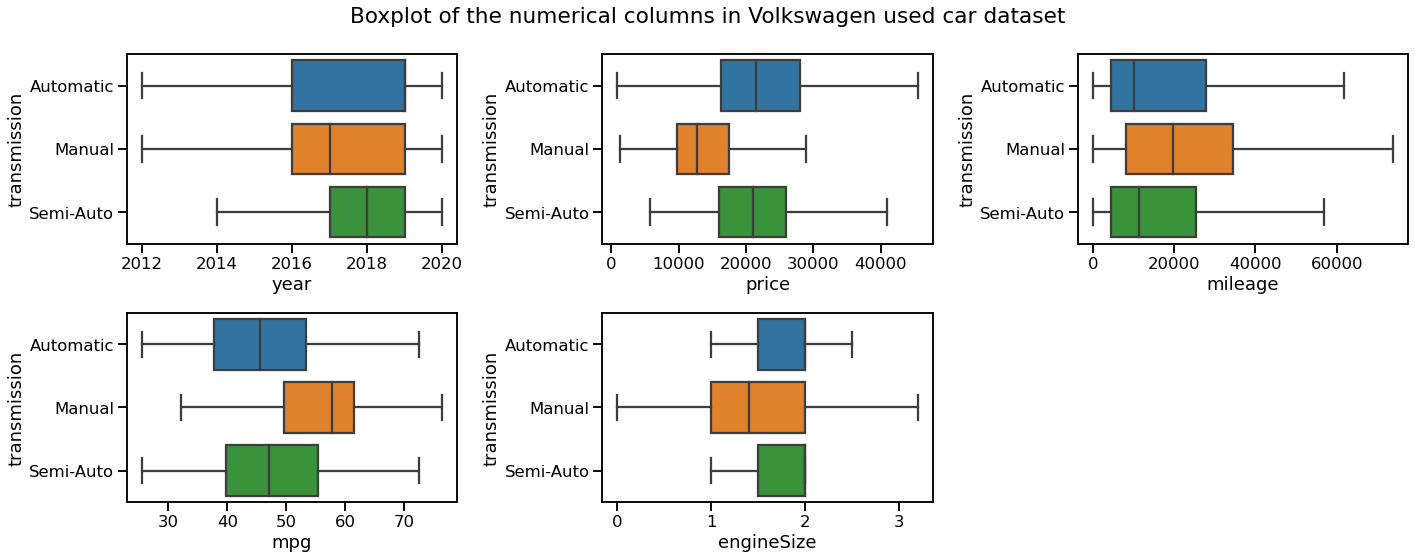

In [26]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=num_cols[index], y=df["transmission"], data=df, showfliers=False)
    plt.xticks(rotation=0)

plt.suptitle("Boxplot of the numerical columns in Volkswagen used car dataset")
plt.tight_layout()
plt.show()

<br> **NOTE**: 
- 'price' column: manual cars are less costlier than other cars,50% of manual cars have prices about 12K $
- 'mileage' column: 50% of manual cars have more mileage than automatic and semi-automatic cars.
- 'mpg' column : manual cars go further in a single gallon compared to other two categories  which is about 58.

#### 8.1.3  Adding categorical features in the boxplot- fuelType

In [27]:
df.fuelType.unique()

array(['Diesel', 'Petrol', 'Other', 'Hybrid'], dtype=object)

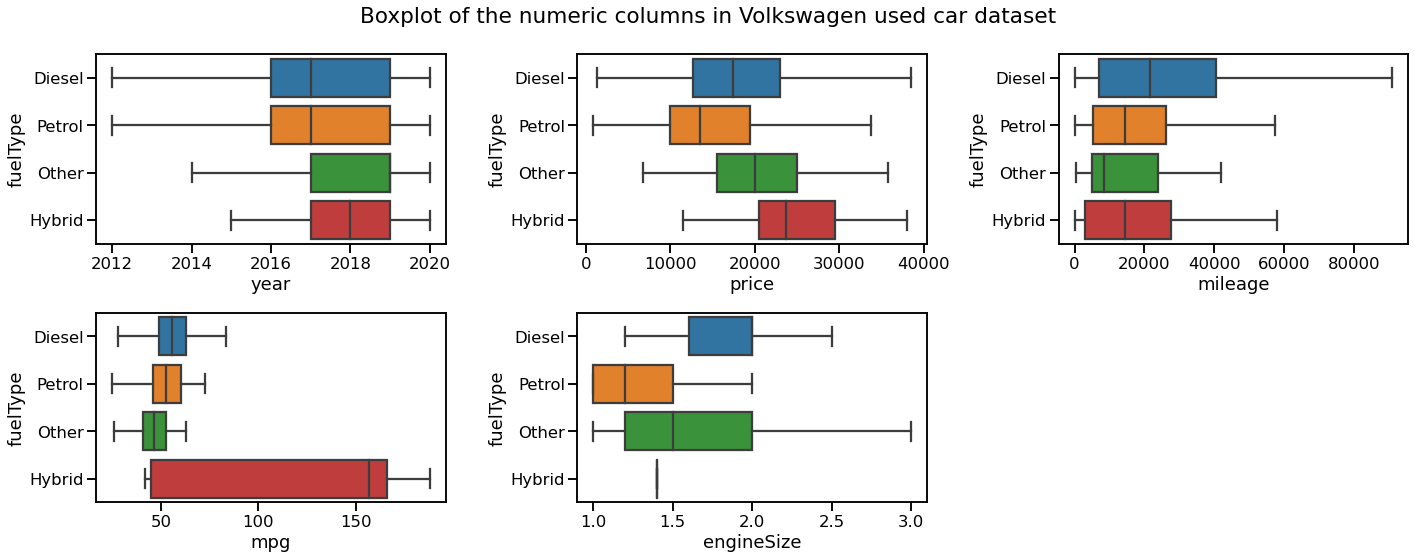

In [28]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=num_cols[index], y=df["fuelType"], data=df, showfliers=False)

plt.suptitle("Boxplot of the numeric columns in Volkswagen used car dataset")
plt.tight_layout()
plt.show()

<br> **NOTE**: 
- 'price': hybrid cars are most expensive and petrol cars are least expensive.
- 'mielage': 50% of diesel cars have more mileage than other fuelTypes.
- 'mpg' : hybrid cars have greater mileage compared to others.

#### 8.2. Violin plot

#### 8.2.1 Violin plot for all numerical variables

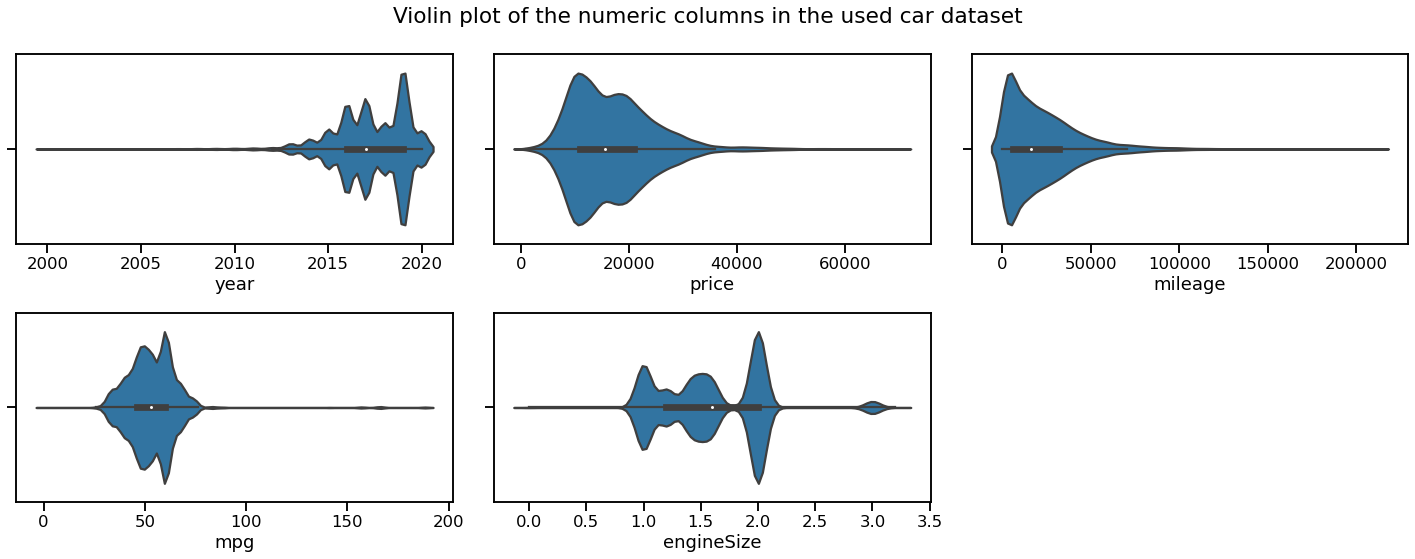

In [29]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(x=num_cols[index],data=df, showfliers=False)

plt.suptitle("Violin plot of the numeric columns in the used car dataset")
plt.tight_layout()
plt.show()

<br> **NOTE**: 
- 'year': most cars are from between 2016 to 2018.
- 'price': most cars are prices around 11K dollar .
- 'enginesize': significant number of cars have enginsize of 2.

#### 8.2.2 Adding categorical features in the violin plot- transmission

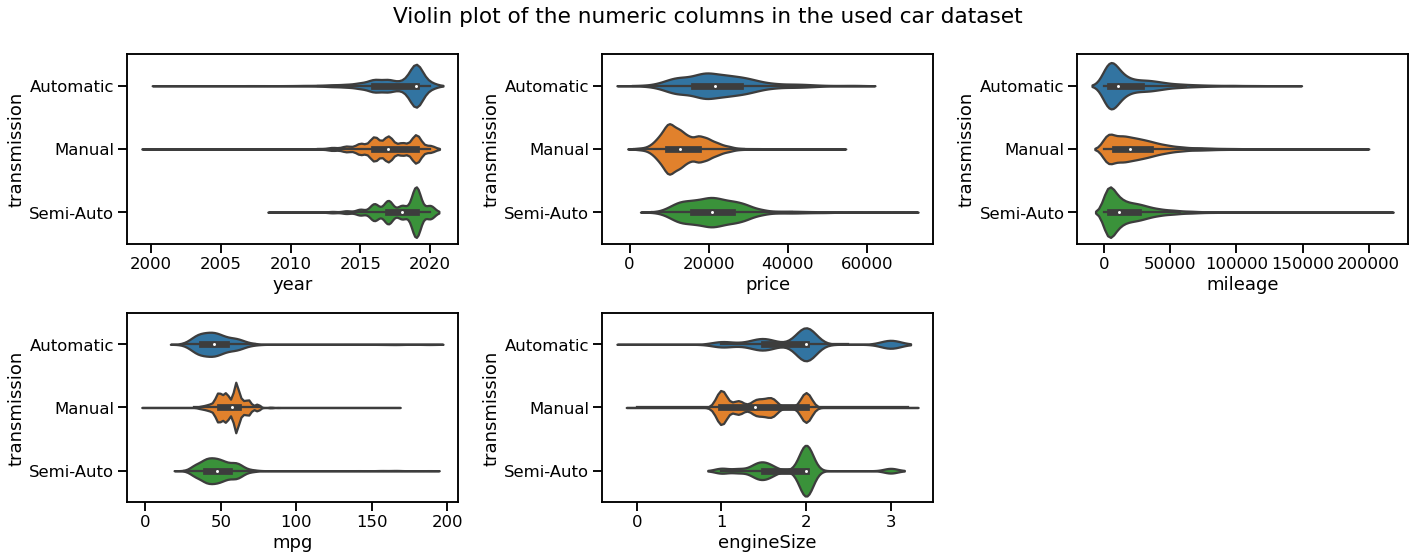

In [30]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(x=num_cols[index],y=df["transmission"], data=df, showfliers=False)

plt.suptitle("Violin plot of the numeric columns in the used car dataset")
plt.tight_layout()
plt.show()

<br> **NOTE**: 
- 'year': for all 3 types, most of the cars are from around 2019.
- 'mpg': for manual cars, most cars have density about 53 mpg .
- 'enginesize': for all 3 types, most cars have enginsize of 2,also for manual cars signifact number of cars have enginsize of 1.

#### 8.2.3 Adding categorical features in the violin plot- fuelType

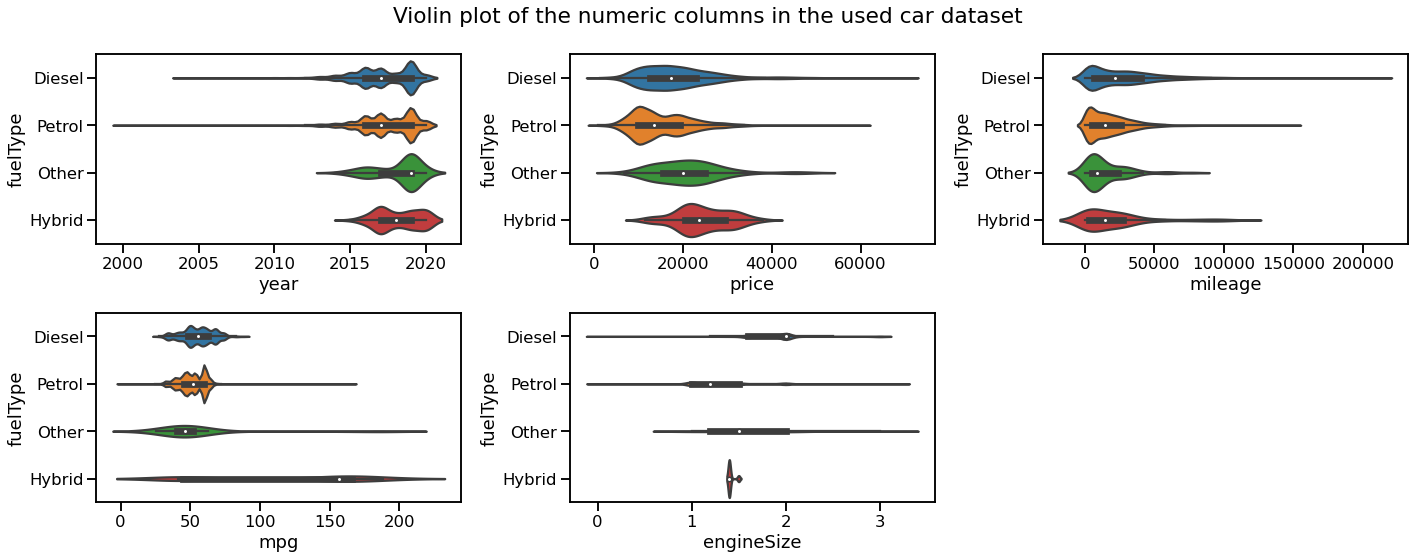

In [31]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(x=num_cols[index],y=df["fuelType"], data=df, showfliers=False)

plt.suptitle("Violin plot of the numeric columns in the used car dataset")
plt.tight_layout()
plt.show()

<br> **NOTE**: 
- 'year': hybrid cars are newer in the market,from early 2014 to 2020, on the other hand petrol cars are from 2000 to 2020.
- 'fuelType': most petrol cars have prices about 16K and for hybrid cars this is about 21K. 
- 'mpg': hybrid cars have more mpg than others.for petrol cars, most cars have 52 mpg.

<br> **Comparison between Box and violin plot:**
- box plot shows the 25th, 50th, 75th percentile values along with maximum and minimum values. Median is the 50th percentile value. 
- Violin plot shows the percentiles and also shows the entire distribution of the data.
- from violin plot we can see the data distrivution which a box plot can not show.

### --- The End ---